In [1]:
#Building a Decision Tree Classifier

import pandas as pd
bank_df=pd.read_csv('bank_kaggle.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2]:
#2 work with X (Predictor variables)
x_features=list(bank_df.columns)
x_features.remove('deposit')
x_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [3]:
#3 Encode the categorical variables 

encode_bank_df=pd.get_dummies(bank_df[x_features])

In [4]:
encode_bank_df.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [5]:
#4 Set the X and Y
X=encode_bank_df
Y=bank_df.deposit.map(lambda x: int(x=='yes'))

In [6]:
#5 split the Dataset

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=100, test_size=0.3)


In [7]:
from sklearn.tree import DecisionTreeClassifier

clf_tree=DecisionTreeClassifier(criterion='gini', max_depth=3)

In [8]:
clf_tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
#7 Accuracy Score

clf_tree.score(X_test,Y_test)

0.783517467900866

[Text(167.4, 190.26, 'X[3] <= 205.5\ngini = 0.499\nsamples = 7813\nvalue = [4102, 3711]'),
 Text(83.7, 135.9, 'X[49] <= 0.5\ngini = 0.328\nsamples = 3117\nvalue = [2473, 644]'),
 Text(41.85, 81.53999999999999, 'X[42] <= 0.5\ngini = 0.273\nsamples = 2903\nvalue = [2430, 473]'),
 Text(20.925, 27.180000000000007, 'gini = 0.248\nsamples = 2827\nvalue = [2416, 411]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.301\nsamples = 76\nvalue = [14, 62]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= 119.5\ngini = 0.321\nsamples = 214\nvalue = [43, 171]'),
 Text(104.625, 27.180000000000007, 'gini = 0.499\nsamples = 57\nvalue = [27, 30]'),
 Text(146.475, 27.180000000000007, 'gini = 0.183\nsamples = 157\nvalue = [16, 141]'),
 Text(251.10000000000002, 135.9, 'X[3] <= 472.5\ngini = 0.453\nsamples = 4696\nvalue = [1629, 3067]'),
 Text(209.25, 81.53999999999999, 'X[34] <= 0.5\ngini = 0.498\nsamples = 2624\nvalue = [1238, 1386]'),
 Text(188.32500000000002, 27.180000000000007, 'gini =

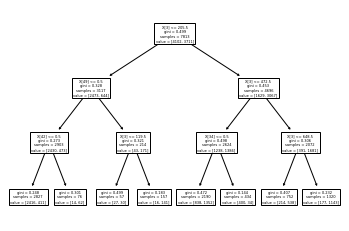

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(clf_tree)


## Task 2 and Task3

In [11]:
df=pd.read_csv('covid.csv')
df.head()

,Headache,Cough,Sore_throat,Breathing_issues,Sickness_days,Taste,smell,Temperature,Vaccine,Is_covid_positive
0,frequent,dry,yes,sometimes,7,no,no,101.0,no,yes
1,sometimes,dry,yes,frequent,5,no,no,102.0,no,yes
2,none,none,no,none,4,yes,yes,100.0,yes,no
3,none,wet,yes,none,2,yes,no,100.0,no,no
4,sometimes,none,no,none,3,yes,yes,99.0,yes,no


In [12]:
x_features=list(df.columns)
x_features.remove('Is_covid_positive')
x_features

['Headache',
 'Cough',
 'Sore_throat',
 'Breathing_issues',
 'Sickness_days',
 'Taste',
 'smell',
 'Temperature',
 'Vaccine']

In [13]:
encode_df=pd.get_dummies(df[x_features])

In [14]:
encode_df.head()

,Sickness_days,Temperature,Headache_frequent,Headache_none,Headache_sometimes,Cough_dry,Cough_none,Cough_wet,Sore_throat_no,Sore_throat_yes,Breathing_issues_frequent,Breathing_issues_none,Breathing_issues_sometimes,Taste_no,Taste_yes,smell_no,smell_yes,Vaccine_no,Vaccine_yes
0,7,101.0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0
1,5,102.0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0
2,4,100.0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1
3,2,100.0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0
4,3,99.0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1


In [15]:
X1=encode_df
Y1=df.Is_covid_positive.map(lambda x: int(x=='yes'))

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1, random_state=25, test_size=0.3)

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf_tree1=DecisionTreeClassifier(criterion='gini', max_depth=3)

In [18]:
clf_tree1.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [19]:

clf_tree1.score(X_test,Y_test)

1.0

[Text(167.4, 163.07999999999998, 'X[1] <= 100.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

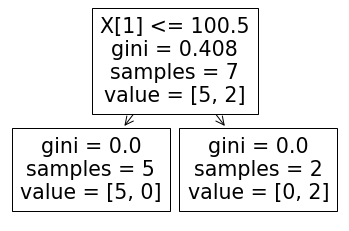

In [20]:
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(clf_tree1)




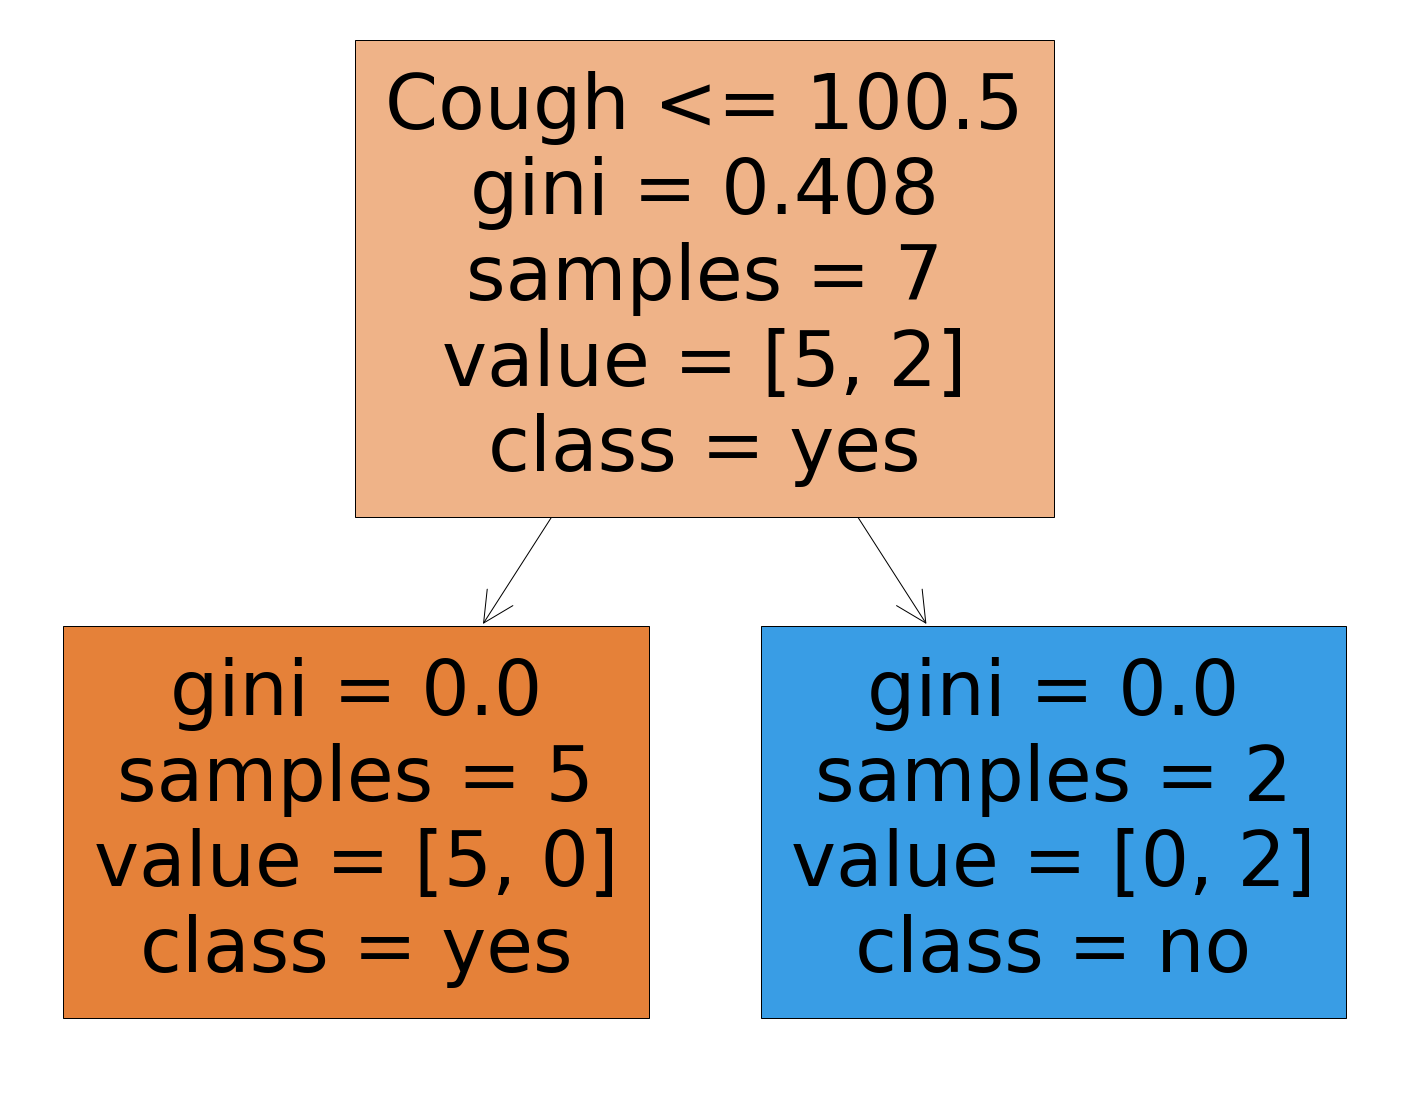

In [23]:
l=['yes','no']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_tree1, 
                   feature_names=x_features,
                   class_names=l,
                   filled=True)
                   